# Week4 (Regression) 과제
## Boston Housing Data 분석
### 데이터 소개
- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 square feet.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxide concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centers.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property tax rate per $10,000.
- **PTRATIO**: Pupil-teacher ratio by town.
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents by town.
- **LSTAT**: Percentage of lower status of the population.

Target Variable:
- **MEDV**: Median value of owner-occupied homes in $1000s.

In [1]:
# 코랩 환경: 구글 드라이브를 코랩에 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [15]:
# housing.xls가 포함된 경로를 저장해봅시다.
PATH = '/content/drive/MyDrive/kubig_data/lab_week4/'

In [16]:
# 본인 구글 드라이브에 업로드한 housing.xls 파일의 주소를 넣어주세요!
house = pd.read_excel(PATH+'housing.xls')
# 왜 이렇게 코드를 짠거지?????
# 간단하게 다음과 같이 짜는게 좋을 것 같다고 생각한다.
# house = pd.read_excel('/content/drive/MyDrive/kubig_data/lab_week4/housing.xls')
# 이유는 PATH를 여러번 쓸 것이 아니라면 한 줄로 작성하는게 나을 것 같다.

# Q1: `head`, `info`, `describe`, `shape` 함수를 실행해봅시다.

과제2 참고

In [17]:
# .head()
print(house.head(),'\n-------------------------------------------')

# .info()
print(house.info(),'\n-------------------------------------------')
# 14열, 506행, Non-Null, CHAS, RAD, TAX는 int 그 외 열은 float

# .describe()
print(house.describe(),'\n-------------------------------------------')

# .shape
print(house.shape,'\n-------------------------------------------')


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2   
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null   

# Q2: 각 변수의 결측치 (NaN 또는 Null)의 개수를 구해봅시다.

과제2 참고

In [22]:
# NaN의 개수 구하기
# total_NaN = house.isnull().sum()
#print(total_NaN)

missing_data = pd.DataFrame({
                             'Missing Values': house.isnull().sum()
})
print(missing_data)

         Missing Values
CRIM                  0
ZN                    0
INDUS                 0
CHAS                  0
NOX                   0
RM                    0
AGE                   0
DIS                   0
RAD                   0
TAX                   0
PTRATIO               0
B                     0
LSTAT                 0
MEDV                  0


# Q3: 각 변수별로 히스토그램을 그리고, Scatterplot Matrix를 그려봅시다

과제2 참고

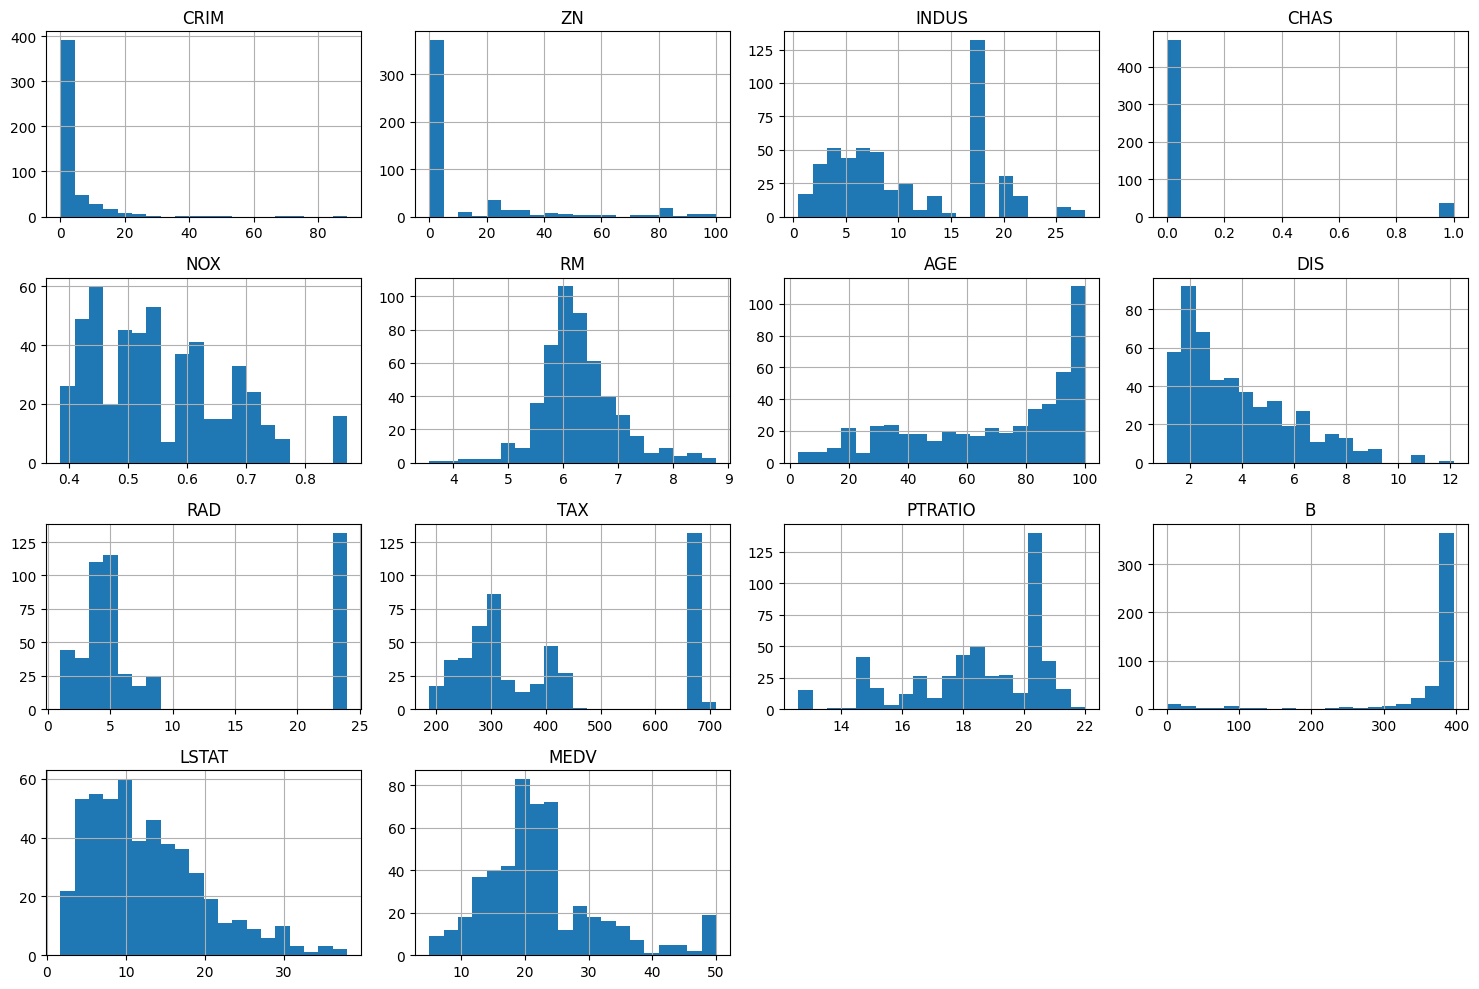

In [25]:
# Histogram
house.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()


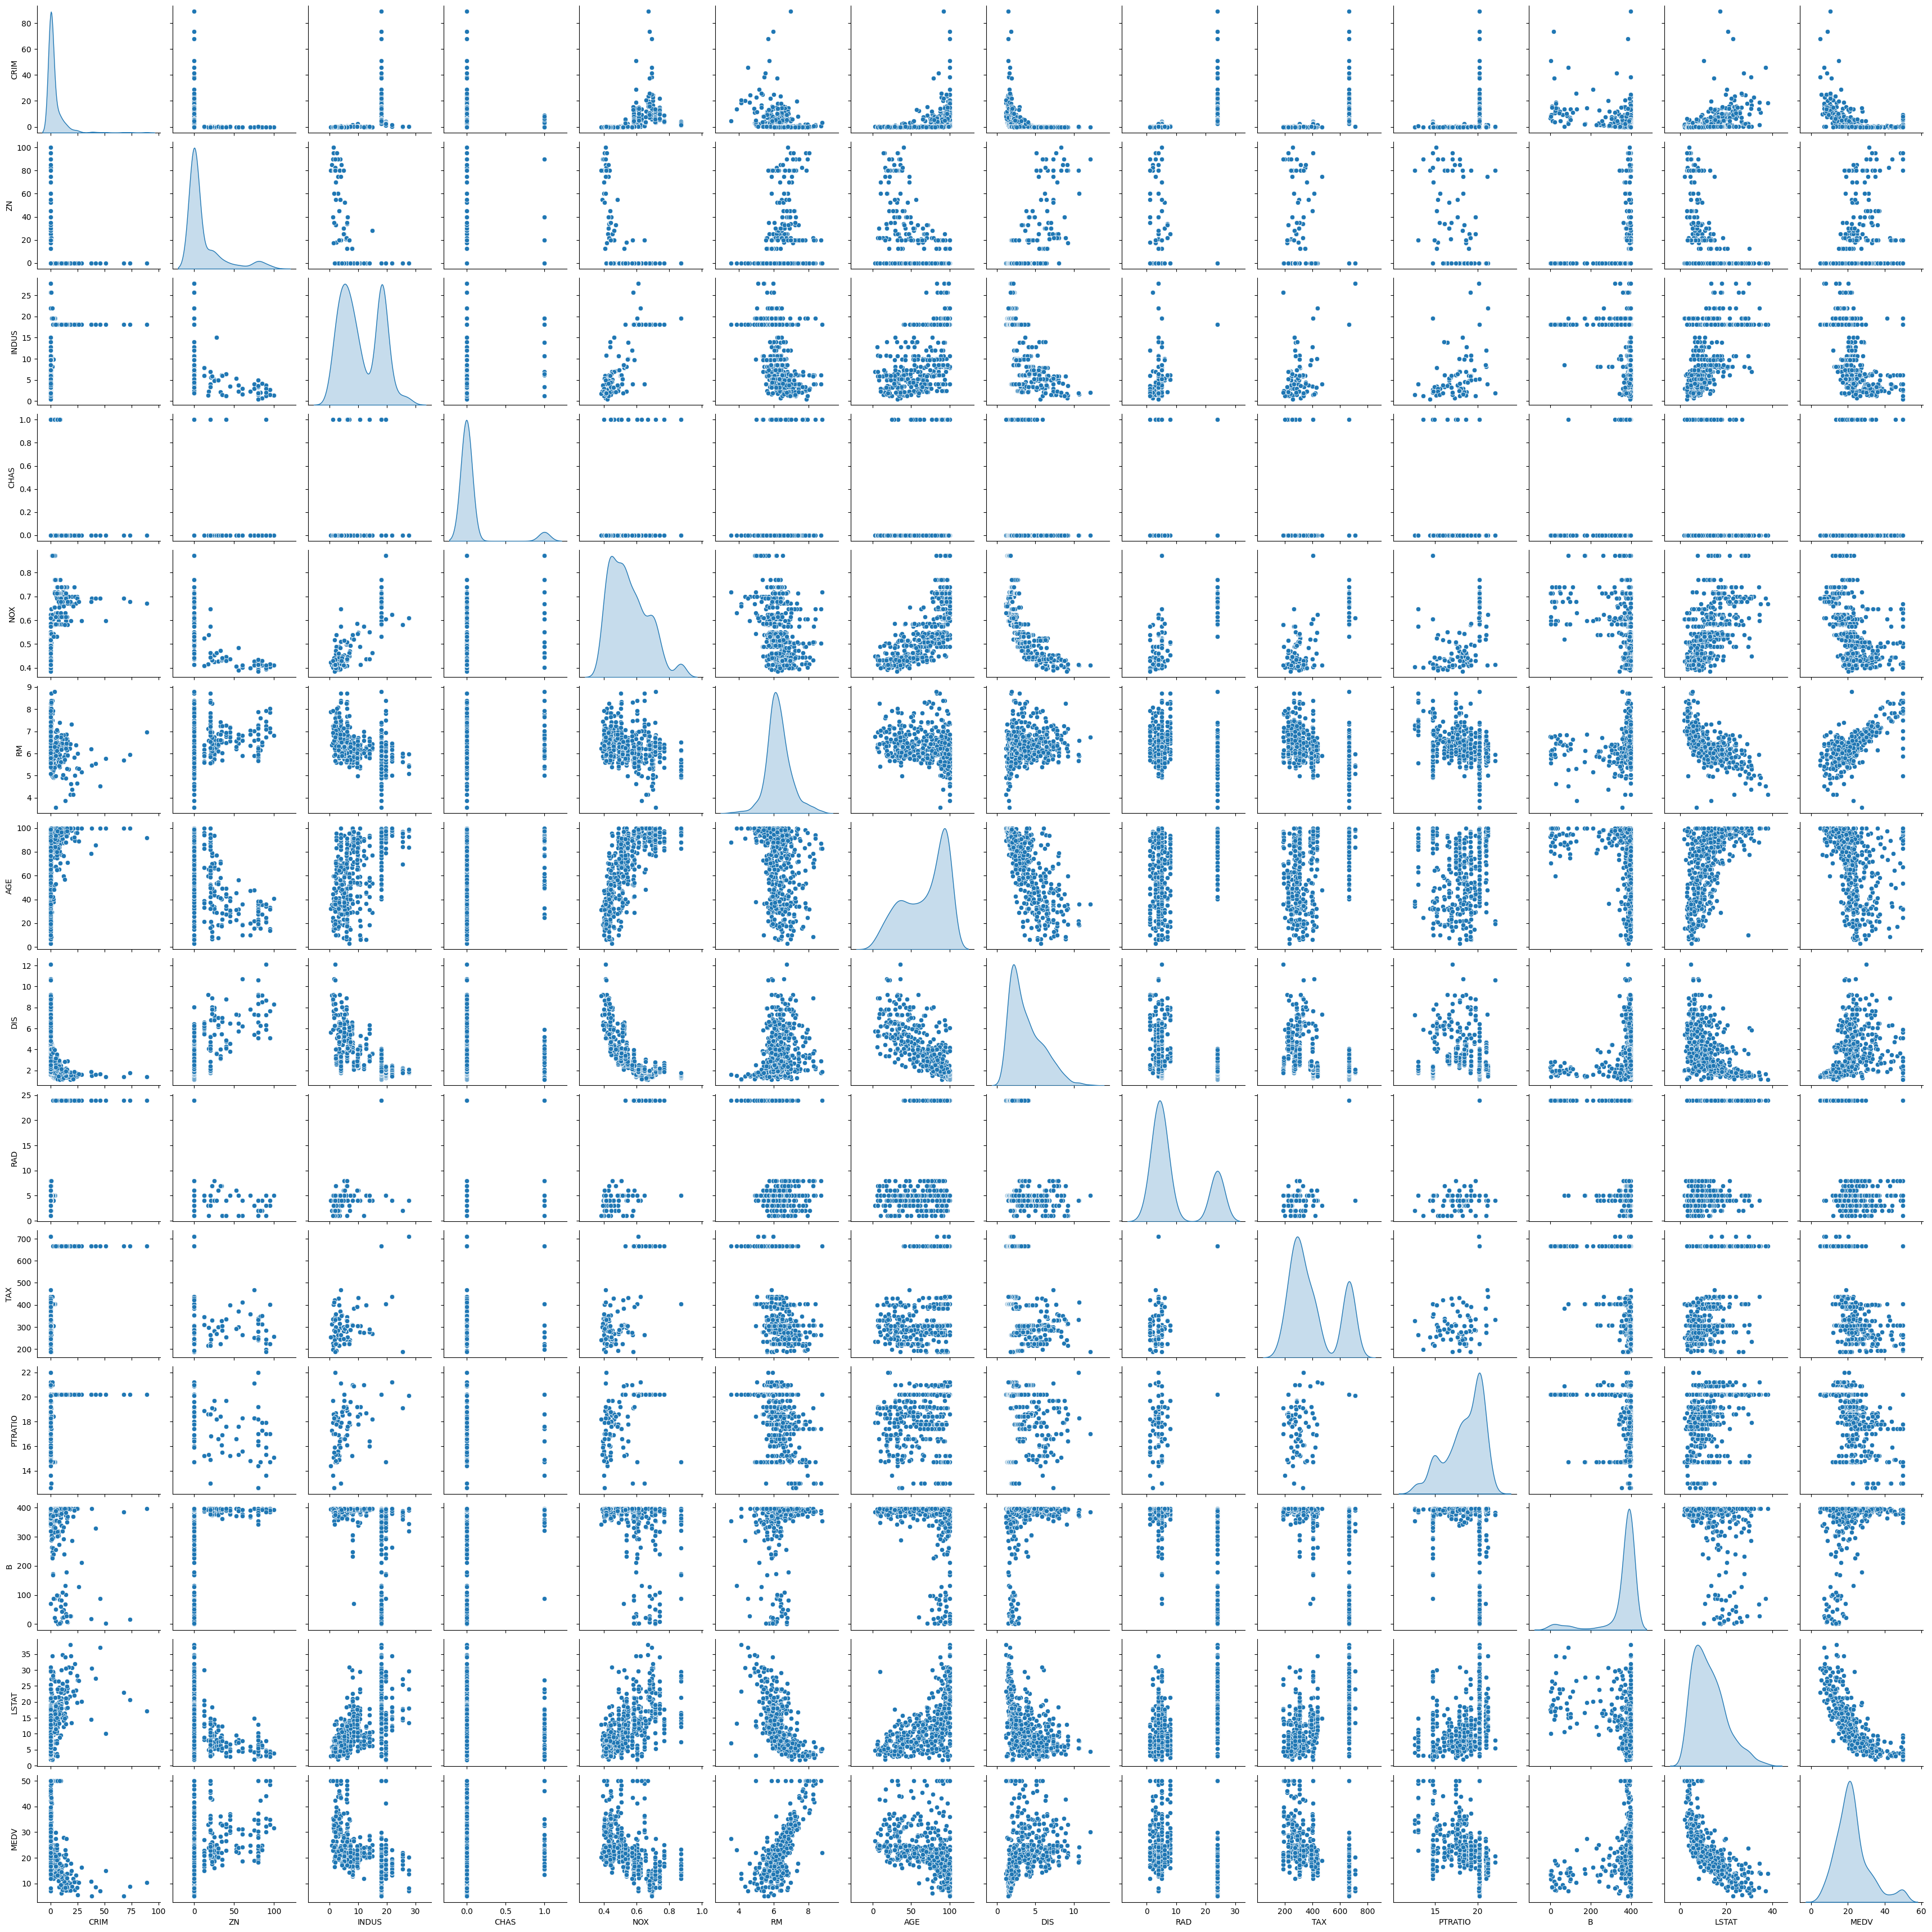

In [28]:
# Scatterplot Matrix
'''
from pandas.plotting import scatter_matrix

scatter_matrix(house, figsize=(15,10))
plt.tight_layout()
plt.show()
'''

sns.pairplot(house, kind = 'scatter', diag_kind= 'kde')
plt.show()


## Q3-1. 다중공선성(multicolinearity)을 확인하기 위해 VIF를 추가로 확인해봅시다.

In [29]:
# 그대로 실행하기 !!
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(house.values, i) for i in range(house.shape[1])]
vif['features'] = house.columns
vif

,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


## Q3-2.
VIF가 높은 변수가 하나씩 줄어들면 다른 변수들의 VIF에도 영향을 미치기 때문에 변수들을 한 번에 다 제거하기보다는 하나씩 제거하면서 확인해 나아가는 것이 바람직합니다! 여러 차례 VIF를 확인해보면서 변수를 제거해보세요!

In [30]:
vif = pd.DataFrame()
x_data = house.drop( 'RM' ,axis=1) # VIF 높은 변수 기입
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,2.110287,CRIM
1,2.889159,ZN
2,14.202832,INDUS
3,1.174535,CHAS
4,62.073615,NOX
5,20.752654,AGE
6,14.258330,DIS
7,15.134503,RAD
8,61.603579,TAX
9,69.068505,PTRATIO


**house 데이터셋에 변수 제거를 적용하지 않고 우선 진행하세요! 추후에 MSE 비교를 통해 변수 제거를 확실히 해봅시다.**

# Q4: 데이터를 `X_train`, `X_test`, `y_train`, `y_test` 로 split해 봅시다

split 비율은 자유롭게 정해보시기 바랍니다.

In [37]:
# train_test_split
X = house.drop('MEDV', axis=1)
y = house['MEDV']

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Q5: `StandardScaler`로 표준화를 해봅시다

CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT 변수들만 `StandardScaler`을 해봅시다. (이들 중 다중공선성으로 인해 제거한 변수들이 있다면 제외하고 진행해주세요.)

문제는 CHAS, RAD 를 제외한 것들에 대해서만 진행하라고 하였고, 다중공산성으로 뺄만한 변수는 RM


`X_train`은 `fit_transform`, `X_test`는 `transform`을 이용하는 것에 유의합시다!

In [38]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

X_train = X_train.drop(['CHAS', 'RAD', 'RM'], axis=1)
X_test = X_test.drop(['CHAS', 'RAD', 'RM'], axis=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Q6: 5-fold Cross-Validation으로 `LinearRegression`을 적합해봅시다.

각 fold마다 적합 후 MSE, MAE, RMSE, $R^2$를 구하고, coefficient과 intercept를 `print` 해보세요.

In [43]:
# KFold, cross_val_score, cross_validation 이용
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

kf = KFold(n_splits=5, shuffle =True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
  X_fold_train, y_fold_train = X_train[train_idx], y_train.iloc[train_idx]
  X_fold_val, y_fold_val = X_train[val_idx], y_train.iloc[val_idx]

  model = LinearRegression()
  model.fit(X_fold_train, y_fold_train)

  y_pred = model.predict(X_fold_val)

  mse = metrics.mean_squared_error(y_fold_val, y_pred)
  mae = metrics.mean_absolute_error(y_fold_val, y_pred)
  rmse = np.sqrt(mse)
  r2 = metrics.r2_score(y_fold_val, y_pred)

  print(f"Fold {fold + 1}:")
  print(f"MSE: {mse}")
  print(f"MAE: {mae}")
  print(f"RMSE: {rmse}")
  print(f"R^2: {r2}")
  print(f"Coefficients: {model.coef_}")
  print(f"Intercept: {model.intercept_}")
  print("-----"*20)




Fold 1:
MSE: 25.25272410178968
MAE: 3.673408669320921
RMSE: 5.0252088615091095
R^2: 0.6448275387410177
Coefficients: [-0.70807679  1.08648924 -0.79236008 -2.21328277  1.00024261 -3.93632384
  0.53955557 -2.52861658  0.77088169 -5.93849828]
Intercept: 22.780469951227282
--------------------------------------------------------------------------------
Fold 2:
MSE: 35.61387740208095
MAE: 3.9802163614532784
RMSE: 5.967736371697476
R^2: 0.6373908101306746
Coefficients: [-0.71875313  1.06343236 -0.74536256 -2.11914131  0.64333348 -3.90954562
  0.32877189 -1.9754124   0.7939304  -6.04734065]
Intercept: 22.57167827253079
--------------------------------------------------------------------------------
Fold 3:
MSE: 41.443173223566006
MAE: 4.299605163936551
RMSE: 6.43763723920244
R^2: 0.5335238324505681
Coefficients: [-0.66946581  0.93781717 -0.5854292  -1.63205508  0.40046678 -3.40553817
  0.09306251 -2.5664389   0.64665241 -5.52190128]
Intercept: 22.84319784435439
-------------------------------

### Q6-1: 다중공선성이 높았던 변수를 제거한 후 다시 train_test_split, scaler, 5-fold CV 과정으로 `LinearRegression`을 적합한 후 Q6에서 구한 평균 MSE(or MAE, RMSE, $R^2$)와 비교해보세요.

In [44]:
# 다중공선성을 불러일으키는 변수 제거
house_new = house.drop(['NOX', 'TAX', 'PTRATIO'], axis=1) # VIF 높은 변수들 기입

In [46]:
# train_test_split
X = house_new.drop('MEDV', axis=1)
y = house_new['MEDV']

X_train1, X_test1, y_train1,y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)
# KFold, cross_val_score, cross_validation 이용

print("Drop some columns")

kf = KFold(n_splits=5, shuffle =True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train1)):
  X_fold_train1, y_fold_train1 = X_train1[train_idx], y_train1.iloc[train_idx]
  X_fold_val1, y_fold_val1 = X_train1[val_idx], y_train1.iloc[val_idx]

  model = LinearRegression()
  model.fit(X_fold_train1, y_fold_train1)

  y_pred1 = model.predict(X_fold_val1)

  mse = metrics.mean_squared_error(y_fold_val1, y_pred1)
  mae = metrics.mean_absolute_error(y_fold_val1, y_pred1)
  rmse = np.sqrt(mse)
  r2 = metrics.r2_score(y_fold_val1, y_pred1)

  print(f"Fold {fold + 1}:")
  print(f"MSE: {mse}")
  print(f"MAE: {mae}")
  print(f"RMSE: {rmse}")
  print(f"R^2: {r2}")
  print(f"Coefficients: {model.coef_}")
  print(f"Intercept: {model.intercept_}")
  print("-----"*20)





Drop some columns
Fold 1:
MSE: 25.78387061225253
MAE: 3.403226826402876
RMSE: 5.077782056395542
R^2: 0.6373571124753286
Coefficients: [-0.85603634  1.25170312 -0.87549668  0.8410603   3.97246531 -0.45478324
 -3.08342308 -0.42775428  1.21136303 -3.53549227]
Intercept: 22.758412174139767
----------------------------------------------------------------------------------------------------
Fold 2:
MSE: 28.54139259315825
MAE: 3.9386022681670156
RMSE: 5.342414490954277
R^2: 0.7094006044581163
Coefficients: [-0.99832446  1.16405968 -0.90631663  0.89362768  3.2181767  -0.53817849
 -2.94767412 -0.36919214  1.16871723 -4.13294834]
Intercept: 22.67755323681921
----------------------------------------------------------------------------------------------------
Fold 3:
MSE: 38.31434729244593
MAE: 4.048875074310752
RMSE: 6.1898584226495785
R^2: 0.5687412787934133
Coefficients: [-0.73860926  1.12955311 -0.49889244  0.3535768   4.05456799 -0.81153836
 -2.86228195 -0.92479798  1.25290519 -3.23867347]
In

# Q7: `GridSearchCV`를 이용하여 `Lasso`를 적합해봅시다.

찾아야 하는 최적 파라미터는

- `alpha`: 0.01, 0.1, 1, 10 중에서 찾기
- `fit_intercept`: `True`, `False`에서 찾기

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

위 링크를 참조하여 `GridSearCV`의 `scoring`을 3가지 이상 사용해보세요

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

lasso = Lasso()

# param_grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False]
}

# scoring 함수 정의
scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lasso, param_grid = param_grid, scoring = scoring, refit = 'neg_mean_squared_error', cv = 5)

# Model
grid_search.fit(X_train1, y_train1)

# 결과 출력
print("Best Parameters:", grid_search.best_params_)





Best Parameters: {'alpha': 0.01, 'fit_intercept': True}


In [52]:
for i in range(len(grid_search.cv_results_['params'])):
    print(f"Trial {i+1}:")
    print(f"Parameters: {grid_search.cv_results_['params'][i]}")
    for scorer in scoring:
        score = grid_search.cv_results_[f'mean_test_{scorer}'][i]
        print(f"{scorer}: {score}")
    print("-" * 20)

Trial 1:
Parameters: {'alpha': 0.01, 'fit_intercept': True}
neg_mean_squared_error: -26.974886405958863
neg_mean_absolute_error: -3.693003814912437
r2: 0.6841158040481389
--------------------
Trial 2:
Parameters: {'alpha': 0.01, 'fit_intercept': False}
neg_mean_squared_error: -566.768910309283
neg_mean_absolute_error: -23.20657636571687
r2: -5.658753377112343
--------------------
Trial 3:
Parameters: {'alpha': 0.1, 'fit_intercept': True}
neg_mean_squared_error: -27.10530792763739
neg_mean_absolute_error: -3.6910323586118885
r2: 0.6828195451882468
--------------------
Trial 4:
Parameters: {'alpha': 0.1, 'fit_intercept': False}
neg_mean_squared_error: -564.6753899986004
neg_mean_absolute_error: -23.17264325435477
r2: -5.633348435761247
--------------------
Trial 5:
Parameters: {'alpha': 1, 'fit_intercept': True}
neg_mean_squared_error: -31.80939292370818
neg_mean_absolute_error: -4.037241697367595
r2: 0.6286813631991017
--------------------
Trial 6:
Parameters: {'alpha': 1, 'fit_intercep

# Q8(Optional): BONUS! `RandomizedSearchCV`를 이용하여 `Ridge`를 적합해 봅시다.

CV를 이용한 hyperparameter tuning의 또다른 방법은 `RandomizedSearchCV`입니다.
Tuning해야 하는 모수가 많을 경우 이 방법이 빠르다는 장점이 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#

위 링크를 참조하거나 구글링을 하여 `Ridge`를 적합해보세요.

`n_iter`와, 파라미터 공간을 자유롭게 조정해보세요.

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform

ridge = Ridge()

param_distributions = {
    'alpha': uniform(loc = 0, scale =10),
    'fit_intercept': [True,False]
}

scoring = {
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_distributions, n_iter=50, scoring=scoring, refit='neg_mean_squared_error', cv=5)

random_search.fit(X_train1, y_train1)

print("Best parameters:", random_search.best_params_)

print("Best score:", random_search.best_score_)



Best parameters: {'alpha': 9.113551455789707, 'fit_intercept': True}
Best score: -26.850808177638562


In [56]:
for i in range(len(random_search.cv_results_['params'])):
    print(f"Trial {i+1}:")
    print(f"Parameters: {random_search.cv_results_['params'][i]}")
    for scorer in scoring:
        score = random_search.cv_results_[f'mean_test_{scorer}'][i]
        print(f"{scorer}: {score}")
    print("-" * 20)

Trial 1:
Parameters: {'alpha': 7.882535716750139, 'fit_intercept': False}
neg_mean_squared_error: -565.5737569074711
neg_mean_absolute_error: -23.18731510055531
r2: -5.644683697760642
--------------------
Trial 2:
Parameters: {'alpha': 4.770827146550527, 'fit_intercept': True}
neg_mean_squared_error: -26.90323594613327
neg_mean_absolute_error: -3.686172289132526
r2: 0.6850740249196574
--------------------
Trial 3:
Parameters: {'alpha': 4.933838284632505, 'fit_intercept': True}
neg_mean_squared_error: -26.900804640106116
neg_mean_absolute_error: -3.6858772504536526
r2: 0.685106546441087
--------------------
Trial 4:
Parameters: {'alpha': 8.140246516401428, 'fit_intercept': True}
neg_mean_squared_error: -26.86044107709959
neg_mean_absolute_error: -3.6803983335756287
r2: 0.6856559835689897
--------------------
Trial 5:
Parameters: {'alpha': 5.5384847158048025, 'fit_intercept': False}
neg_mean_squared_error: -565.964026411783
neg_mean_absolute_error: -23.193696968384323
r2: -5.649339323049